In [23]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [24]:
x, y=make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20, random_state=13)

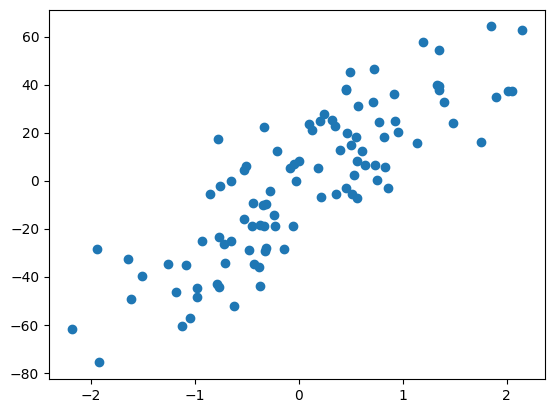

In [25]:
plt.scatter(x,y)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x,y)

LinearRegression()

In [29]:
lr.coef_

array([27.82809103])

In [30]:
lr.intercept_

-2.29474455867698

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

lr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(x_test)
y_pred

array([ 21.09901593,  18.03495551,  18.23747414,  -8.10292651,
        15.72634513,  58.21059953, -15.03324179, -11.33105581,
       -15.81005402,  -8.8082183 , -23.57512364,  14.78144416,
        12.70150681, -23.8893975 , -22.30769518, -16.670531  ,
        24.52827391, -16.98551717,  -3.88916883, -12.01966768])

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test,y_pred)

0.6345158782661012

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))

0.6375011587464419

In [37]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,x,y):
        #Calculating the b using Gradient descent
        for i in range(self.epochs):
            loss_slope_b= -2 * np.sum( y - self.m * x.ravel() - self.b)
            loss_slope_m= -2 * np.sum( (y - self.m * x.ravel() - self.b)* x.ravel()) 

            self.b=self.b-(self.lr * loss_slope_b)
            self.m=self.m-(self.lr * loss_slope_m)
            
            
            print('epochs no=',i,'\t\t','Slope Loss of b is:',loss_slope_b, '\tb b value is:',self.b,'\n')
            print('epochs no=',i,'\t\t','Slope Loss of m is:',loss_slope_m, '\tb m value is:',self.m,'\n')


        print('\n\n the Value of b is:',self.b)
        print('\n\n the Value of m is:',self.m)

    def predict(self,x):
        return self.m *x + self.b

In [38]:
gd=GDRegressor(learning_rate=0.001,epochs=50)

In [39]:
gd.fit(x,y)

epochs no= 0 		 Slope Loss of b is: -22697.976504888527 	b b value is: -97.30202349511147 

epochs no= 0 		 Slope Loss of m is: 11209.822193922304 	b m value is: 88.7901778060777 

epochs no= 1 		 Slope Loss of b is: -18289.32849782429 	b b value is: -79.01269499728718 

epochs no= 1 		 Slope Loss of m is: 9520.283799304067 	b m value is: 79.26989400677363 

epochs no= 2 		 Slope Loss of b is: -14742.67378619848 	b b value is: -64.2700212110887 

epochs no= 2 		 Slope Loss of m is: 8073.854851267904 	b m value is: 71.19603915550572 

epochs no= 3 		 Slope Loss of b is: -11888.453588631008 	b b value is: -52.381567622457695 

epochs no= 3 		 Slope Loss of m is: 6838.213112591715 	b m value is: 64.357826042914 

epochs no= 4 		 Slope Loss of b is: -9590.643308507377 	b b value is: -42.79092431395032 

epochs no= 4 		 Slope Loss of m is: 5784.691756975142 	b m value is: 58.573134285938856 

epochs no= 5 		 Slope Loss of b is: -7740.088397628653 	b b value is: -35.05083591632167 

epochs n

In [40]:
gd.predict(x)

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=2)

gd.fit(x_train,y_train)

epochs no= 0 		 Slope Loss of b is: -6.848320913489971 	b b value is: -2.2923356099158294 

epochs no= 0 		 Slope Loss of m is: -44.07414067726647 	b m value is: 27.88113461249732 

epochs no= 1 		 Slope Loss of b is: -5.39543553972608 	b b value is: -2.2869401743761033 

epochs no= 1 		 Slope Loss of m is: -37.32988420144089 	b m value is: 27.91846449669876 

epochs no= 2 		 Slope Loss of b is: -4.229663790080053 	b b value is: -2.282710510586023 

epochs no= 2 		 Slope Loss of m is: -31.62092017563819 	b m value is: 27.950085416874398 

epochs no= 3 		 Slope Loss of b is: -3.2966780104439266 	b b value is: -2.279413832575579 

epochs no= 3 		 Slope Loss of m is: -26.787804361633277 	b m value is: 27.97687322123603 

epochs no= 4 		 Slope Loss of b is: -2.5521350249607337 	b b value is: -2.2768616975506184 

epochs no= 4 		 Slope Loss of m is: -22.695730273912872 	b m value is: 27.999568951509943 

epochs no= 5 		 Slope Loss of b is: -1.9598789679064907 	b b value is: -2.2749018185827

In [42]:
y_pred=gd.predict(x_test)
y_pred

array([[ 21.0989732 ],
       [ 18.03492167],
       [ 18.23743972],
       [ -8.1028845 ],
       [ 15.72631799],
       [ 58.21044911],
       [-15.03317968],
       [-11.33100444],
       [-15.80998965],
       [ -8.80817425],
       [-23.57503674],
       [ 14.78141976],
       [ 12.70148845],
       [-23.88930969],
       [-22.30761196],
       [-16.67046414],
       [ 24.52822123],
       [-16.9854494 ],
       [ -3.88913906],
       [-12.01961432]])

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.6345162275128353